<a href="https://colab.research.google.com/github/OUCTheoryGroup/colab_demo/blob/master/03%20-%20Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python中的图像处理

我们将写一些非常简单的代码来学习 python 中的图像处理。主要包括：理解图像类型，进行一些基本的图像分割操作。

## 1. 下载并显示图像

In [0]:
!wget https://raw.githubusercontent.com/summitgao/ImageGallery/master/yeast_colony_array.jpg

In [0]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import skimage
from skimage import data
from skimage import io

colony = io.imread('yeast_colony_array.jpg')
print(type(colony))
print(colony.shape)

In [0]:
# Plot all channels of a real image
plt.subplot(121)
plt.imshow(colony[:,:,:])
plt.title('3-channel image')
plt.axis('off')

# Plot one channel only
plt.subplot(122)
plt.imshow(colony[:,:,0])
plt.title('1-channel image')
plt.axis('off');

## 2. 读取并改变图像像素值



153


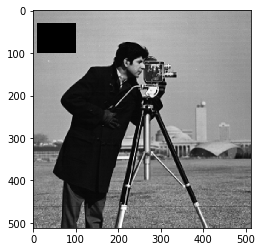

In [0]:
# Get the pixel value at row 10, column 10 on the 10th row and 20th column
camera = data.camera()
print(camera[10, 20])

# Set a region to black
camera[30:100, 10:100] = 0
plt.imshow(camera, 'gray')

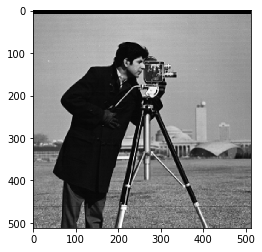

In [0]:
# Set the first ten lines to black
camera = data.camera()
camera[:10] = 0
plt.imshow(camera, 'gray')

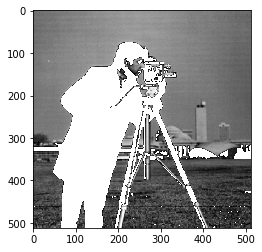

In [0]:
# Set to "white" (255) pixels where mask is True
camera = data.camera()
mask = camera < 80
camera[mask] = 255
plt.imshow(camera, 'gray')

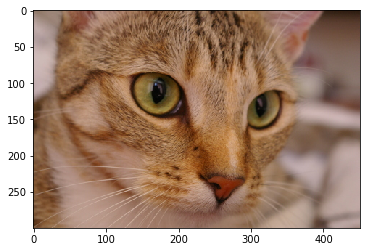

In [0]:
# Change the color for real images
cat = data.chelsea()
plt.imshow(cat)

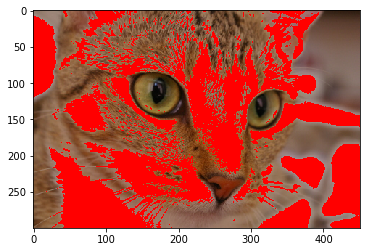

In [0]:
# Set brighter pixels to red
red_cat = cat.copy()
reddish = cat[:, :, 0] > 160
red_cat[reddish] = [255, 0, 0]
plt.imshow(red_cat)

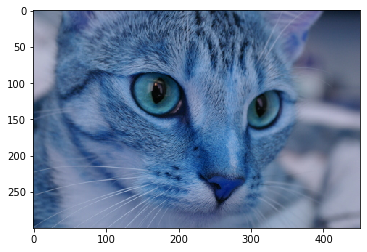

In [0]:
# Change RGB color to BGR for openCV
BGR_cat = cat[:, :, ::-1]
plt.imshow(BGR_cat)

## 3. 转换图像数据类型

- img_as_float Convert to 64-bit floating point.
- img_as_ubyte Convert to 8-bit uint.
- img_as_uint Convert to 16-bit uint.
- img_as_int Convert to 16-bit int.

In [0]:
from skimage import img_as_float, img_as_ubyte
float_cat = img_as_float(cat)
uint_cat = img_as_ubyte(float_cat)

## 4. 显示图像直方图


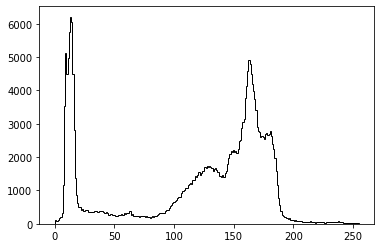

In [0]:
img = data.camera()
plt.hist(img.ravel(), bins=256, histtype='step', color='black');

## 5. 图像分割

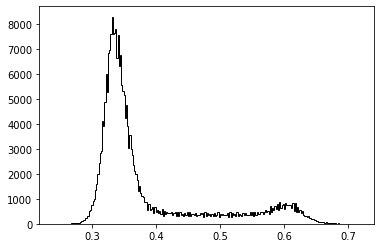

In [0]:
# Use colony image for segmentation
colony = io.imread('yeast_colony_array.jpg')

# Plot histogram
img = skimage.color.rgb2gray(colony)
plt.hist(img.ravel(), bins=256, histtype='step', color='black');

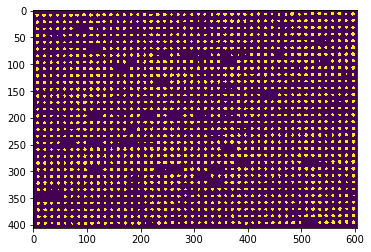

In [0]:
# Use thresholding
plt.imshow(img>0.5)

## 6. Canny 算子用于边缘检测

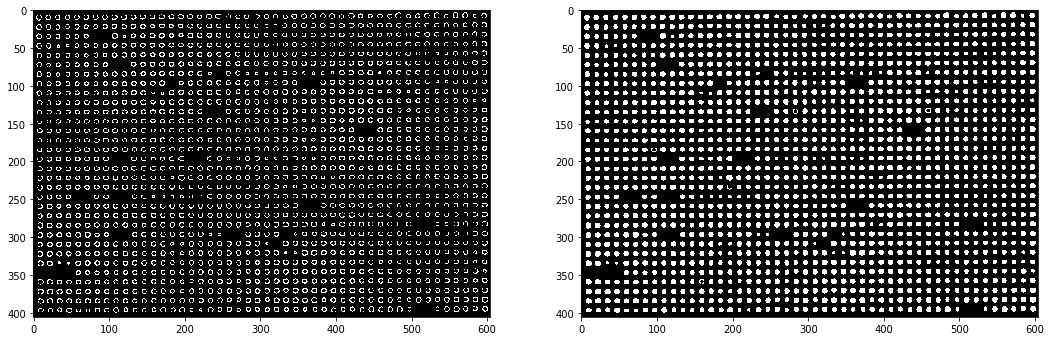

In [0]:
from skimage.feature import canny
from scipy import ndimage as ndi
img_edges = canny(img)
img_filled = ndi.binary_fill_holes(img_edges)

# Plot
plt.figure(figsize=(18, 12))
plt.subplot(121)
plt.imshow(img_edges, 'gray')
plt.subplot(122)
plt.imshow(img_filled, 'gray')

## 7. 改变图像的对比度

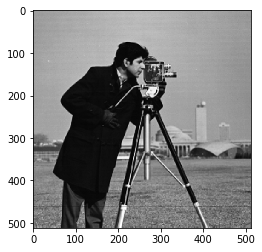

In [0]:
# Load an example image
img = data.camera()
plt.imshow(img, 'gray')

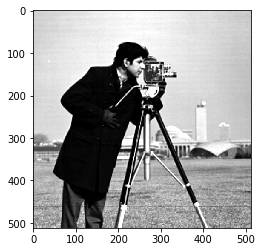

In [0]:
# Contrast stretching
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))
plt.imshow(img_rescale, 'gray')

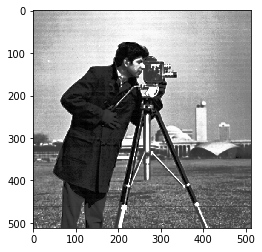

In [0]:
# Equalization
img_eq = exposure.equalize_hist(img)
plt.imshow(img_eq, 'gray')

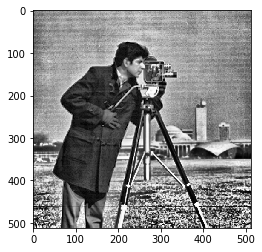

In [0]:
# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)
plt.imshow(img_adapteq, 'gray')

In [0]:
# Display results
def plot_img_and_hist(img, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    img = img_as_float(img)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(img, cmap=plt.cm.gray)
    ax_img.set_axis_off()
    ax_img.set_adjustable('box')

    # Display histogram
    ax_hist.hist(img.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(img, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf

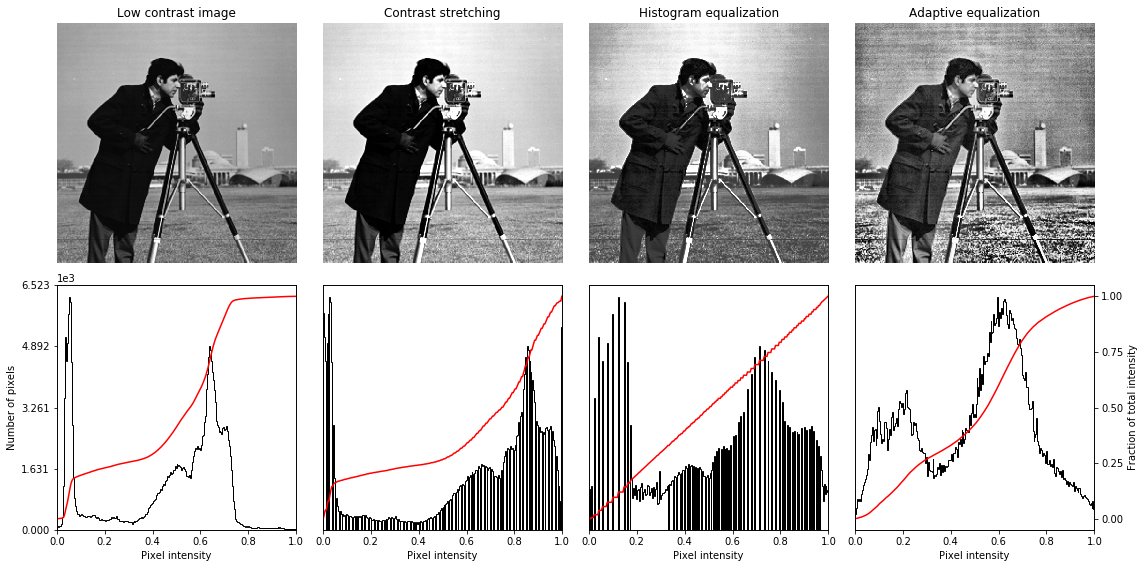

In [0]:
fig = plt.figure(figsize=(16, 8))
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

fig.tight_layout()
plt.show()
